### Task Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"D:\Jupyter\glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [23]:
X = df.drop(columns="Type")
y = df["Type"].values

In [24]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [25]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [35]:
k = np.ceil(np.sqrt(X_train.shape[0]))


14

In [38]:
knn = KNeighborsClassifier(n_neighbors=int(k))
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [40]:
y_pred = knn.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred)

0.6744186046511628

In [43]:
accuracy_scores = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))

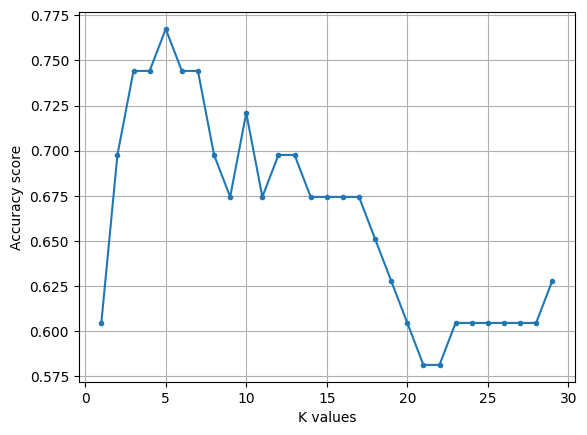

In [51]:
plt.plot(range(1,30),np.array(accuracy_scores),marker=".")
plt.xlabel("K values")
plt.ylabel("Accuracy score")
plt.grid(True)
plt.show()

In [ ]:
From above graph of Accuracy score vs K values, best value for n_beighbours is 5

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
y_pred = knn.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred)

0.7674418604651163

### Considering only two features

In [78]:
X_train_plot = X_train[:,:2]
X_test_plot = X_test[:,:2]
y_train

array([1, 7, 1, 5, 1, 2, 1, 7, 5, 2, 2, 1, 6, 2, 2, 2, 2, 6, 1, 2, 2, 1,
       2, 3, 6, 6, 1, 1, 3, 7, 1, 7, 2, 2, 3, 2, 6, 2, 7, 1, 1, 7, 3, 3,
       2, 2, 2, 5, 1, 2, 3, 2, 2, 2, 6, 2, 7, 3, 2, 2, 1, 2, 2, 7, 5, 5,
       7, 2, 1, 2, 7, 3, 1, 1, 1, 2, 5, 2, 7, 2, 1, 2, 5, 7, 7, 3, 1, 1,
       7, 3, 2, 1, 1, 5, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 7, 1, 1, 7, 2, 2, 2, 2, 2, 2, 3, 2, 5, 7, 2, 1, 1, 7, 2, 1,
       1, 2, 7, 2, 7, 1, 2, 1, 1, 7, 1, 1, 1, 2, 1, 2, 5, 1, 2, 5, 1, 2,
       2, 3, 1, 1, 1, 7, 2, 6, 3, 1, 2, 2, 1, 1, 2, 1, 5], dtype=int64)

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_plot,y_train)

KNeighborsClassifier()

In [81]:
y_pred1 = knn.predict(X_test_plot)

In [82]:
accuracy_score(y_test,y_pred)

0.7674418604651163

In [83]:
x = np.arange(start = X_train_plot[:,0].min()-1,stop = X_train_plot[:,1].max()+1,step = 0.01)
y = np.arange(start = X_train_plot[:,1].min()-1,stop = X_train_plot[:,1].max()+1,step = 0.01)

In [84]:
XX,YY = np.meshgrid(x,y)

In [85]:
XX.shape

(991, 902)

In [86]:
input_array = np.array([np.ravel(XX),np.ravel(YY)]).T

In [87]:
labels = knn.predict(input_array)

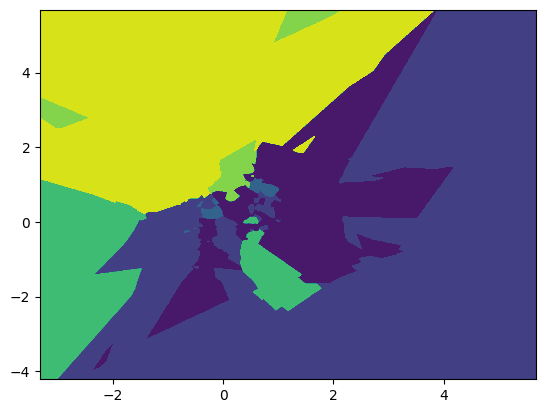

In [88]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

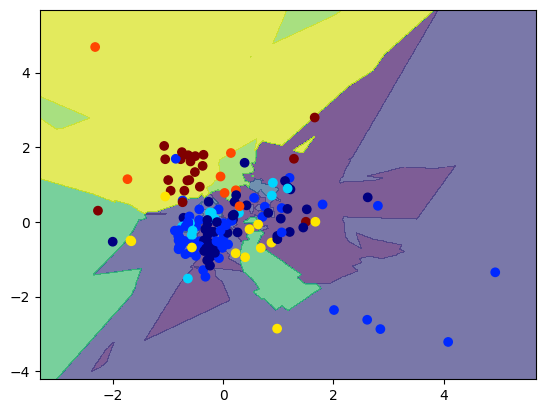

In [91]:
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.7)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap="jet")